In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline

import re
import nltk

from nltk.corpus import stopwords
st = set(stopwords.words('english'))
#nltk.download('stopwords')
#nltk.download('wordnet') 

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
def lemmatize(bio):
    
    stop_words = set(stopwords.words("english"))
    new_words = ["using", "show", "result", "large", "also", "one", "two", "new", "previously", "shown", 'math']
    stop_words = stop_words.union(new_words)

    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', bio)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # remove periods
    text = text.replace('.', '').replace(',' , '')
    
    #Convert to list from string
    text = text.split()
    
    ##Stemming
    stemmer=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    #text = [stemmer.stem(lem.lemmatize(word)) for word in text if not word in stop_words]
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = " ".join(text)
    return text

In [3]:
experience_list = ['experience teaching tutoring', 'experience tutoring student', 'experience working student', 
                   'many student', 'many year', 
                   'year experience teaching', 'year experience tutoring',
                   'year experience working',
                   'year teaching experience', 'year tutoring experience']
                   
welcoming_list = ['look forward hearing', 'look forward helping', 'look forward meeting', 'look forward working',
                  'forward working', 'hello name', 'hi name', 'please contact', 'please feel',
                  'would like', 'would love', 'feel free contact', 'feel free reach', 'free contact question']
                  
goal_list = ['goal help student', 'achieve academic goal',  
             'help student succeed', 'helping student achieve']

passion_list = ['enjoy helping student', 'enjoy working student', 'look forward', 
                 'believe every student', 'love help', 'love teaching', 
                 'love helping student', 'love working student', 'would love help']

In [4]:
popular_subjects = ['Prealgebra',
 'Algebra 1',
 'Geometry',
 'Algebra 2',
 'Elementary Math',
 'Trigonometry',
 'Precalculus',
 'SAT Math',
 'ACT Math',
 'Grammar',
 'Vocabulary',
 'Calculus',
 'Elementary Science',
 'GED',
 'Reading',
 'English',
 'Proofreading',
 'Probability',
 'GRE',
 'Spelling',
 'Writing',
 'PSAT',
 'ACT Science',
 'ACT English',
 'Biology',
 'Physical Science',
 'Microsoft Word',
 'Statistics',
 'Microsoft Excel',
 'SAT Reading',
 'Chemistry',
 'SAT Writing',
 'ACT Reading',
 'Physics',
 'American History']

full_subjects_list = ['Prealgebra',
 'Algebra 1',
 'Geometry',
 'Algebra 2',
 'Elementary Math',
 'Trigonometry',
 'Precalculus',
 'SAT Math',
 'ACT Math',
 'Grammar',
 'Vocabulary',
 'Calculus',
 'Elementary Science',
 'GED',
 'Reading',
 'English',
 'Proofreading',
 'Probability',
 'GRE',
 'Spelling',
 'Writing',
 'PSAT',
 'ACT Science',
 'ACT English',
 'Biology',
 'Physical Science',
 'Microsoft Word',
 'Statistics',
 'Microsoft Excel',
 'SAT Reading',
 'Chemistry',
 'SAT Writing',
 'ACT Reading',
 'Physics',
 'American History',
 'Microsoft PowerPoint',
 'ASVAB',
 'Literature',
 'General Computer',
 'ESL/ESOL',
 'Geography',
 'TOEFL',
 'GMAT',
 'World History',
 'SSAT',
 'Anatomy',
 'Psychology',
 'Government & Politics',
 'Spanish',
 'European History',
 'Physiology',
 'Study Skills',
 'Astronomy',
 'Microeconomics',
 'Ecology',
 'HTML',
 'Macroeconomics',
 'Philosophy',
 'Java',
 'Music Theory',
 'Microbiology',
 'Biochemistry',
 'Linear Algebra',
 'Social Studies',
 'Phonics',
 'Financial Accounting',
 'Managerial Accounting',
 'Finance',
 'Differential Equations',
 'Geology',
 'Computer Programming',
 'SQL',
 'Python',
 'LSAT',
 'SPSS',
 'French',
 'Handwriting',
 'Nursing',
 'Political Science',
 'Adobe Photoshop',
 'JavaScript',
 'Art History',
 'German',
 'C',
 'Law',
 'Latin',
 'Adobe Illustrator',
 'R',
 'Art Theory',
 'Chinese',
 'Italian',
 'Japanese',
 'Portuguese',
 'NCLEX',
 'Discrete Math',
 'Romanian',
 'Elementary (K-6th)',
 'Organic Chemistry',
 'TAKS',
 'Business',
 'Public Speaking',
 'Special Needs',
 'Biostatistics',
 'Macintosh',
 'Praxis',
 'Russian',
 'Computer Science',
 'Track & Field']

In [5]:
undergrad = ['BA', 'B.A.', 'BS', 'B.S.', '']
postgrad = ['MS', 'M.S', 'MA', 'M.A', 'masters', 'Masters', 'CA', 'C.A', 
            'MBA', 'M.B.A', 'MD', 'M.D', 'PhD', 'Ph.D', 'Ph.D.', 'Graduate']
certified = ['education', 'Ced', 'certified']

list_of_top_schools = ['Harvard University',
 'Massachusetts Institute of Technology',
 'Stanford University',
 'University of Cambridge',
 'California Institute of Technology',
 'Princeton University',
 'University of Oxford',
 'Yale University',
 'Columbia University',
 'University of California, Berkeley',
 'University of Chicago',
 'Cornell University',
 'University of Pennsylvania',
 'University of Tokyo',
 'Johns Hopkins University',
 'Swiss Federal Institute of Technology in Zurich',
 'Kyoto University',
 'Weizmann Institute of Science',
 'University of California, Los Angeles',
 'University of California, San Diego',
 'Rockefeller University',
 'Hebrew University of Jerusalem',
 'New York University',
 'University of California, San Francisco',
 'University of Wisconsin–Madison',
 'University of Illinois at Urbana–Champaign',
 'Duke University',
 'Imperial College London',
 'University of Texas Southwestern Medical Center',
 'University of Texas at Austin',
 'Berkeley',
 'Caltech',
 'Harvard',
 'Yale',
 'Princeton',
 'MIT',
 'Stanford']

In [160]:
desc_input = 'Whats up, man?'
bio_input = 'experience teaching and tutoring. I really look forward to hearing from you! also enjoy helping students'
schedule_input = 40.0
subjects_input = ['Algebra 1', 'Precalculus']
edu_input = 'BS Physics, Colorodo State University. PhD in Physics, UC Berkeley.'
rate_input = 50.0

In [161]:
bio_input_lemm = lemmatize(bio_input)

number_subjects = len(subjects_input)

num_popular_subjects = 0
for f in subjects_input:
    if f in popular_subjects:
        num_popular_subjects += 1

desc_count = len(desc_input.split(' '))
bio_count = len(bio_input_lemm.split(' '))

experience_count = 0
welcoming_count = 0
goal_count = 0
passion_count = 0
for b in bio_input_lemm:
    if any(x in b for x in experience_list):
        experience_count += 1
    if any(x in b for x in welcoming_list):
        welcoming_count += 1
    if any(x in b for x in goal_list):
        goal_count += 1
    if any(x in b for x in passion_list):
        passion_count += 1

number_degrees = edu_input.count(',') + 1

undergrad_count = 0
postgrad_count = 0
certified_count = 0
if any(x in edu_input for x in undergrad):
    undergrad_count += 1
if any(x in edu_input for x in postgrad):
    postgrad_count += 1
if any(x in edu_input for x in certified):
    certified_count +=1

top_school = 0
if any(x in edu_input for x in list_of_top_schools):
    top_school += 1

In [162]:
important_features_rate = ['number_subjects', 
                           'top_school', 
                           'hours_per_week_schedule', 
                           'bio_count', 
                           'number_degrees', 
                           'desc_count', 
                           'num_popular_subjects']

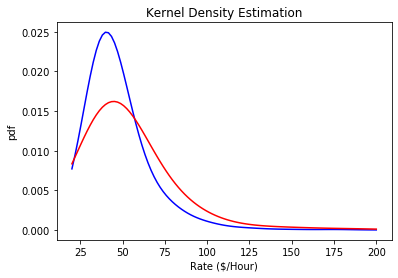

In [166]:
rate_data = pd.read_csv('tutor_data_rate.csv').drop(columns='Unnamed: 0')
rate_data_f = rate_data.drop(columns=['rate'])
rate_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA(n_components=3))
        ])
rate_pipe.fit(rate_data_f)
rate_trans = rate_pipe.transform(rate_data_f)
rate_data_test = [number_subjects, 
                  top_school, 
                  schedule_input, 
                  bio_count, 
                  number_degrees, 
                  desc_count, 
                  num_popular_subjects]
input_rate = rate_pipe.transform(np.array(rate_data_test).reshape(1,-1))
weights_rate = (1. / np.linalg.norm(input_rate - rate_trans, axis=-1))

rate_gkde = stats.gaussian_kde(rate_data.rate, bw_method = 0.5, weights=weights_rate**4)
rate_gkde_none = stats.gaussian_kde(rate_data.rate, bw_method = 0.5, weights=None)
rate_ind = np.linspace(20, 200, 101)
rate_kdepdf = rate_gkde.evaluate(rate_ind)
rate_kdepdf_none = rate_gkde_none.evaluate(rate_ind)

plt.plot(rate_ind, rate_kdepdf, color="b")
plt.plot(rate_ind, rate_kdepdf_none, color="r")
plt.title('Kernel Density Estimation')
plt.ylabel('pdf')
plt.xlabel('Rate ($/Hour)')
plt.show()

In [202]:
demand_data = pd.read_csv('tutor_data_demand.csv').drop(columns=['Unnamed: 0'])
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf = 5, criterion='entropy', random_state=0)
X = demand_data.drop(columns=['hours_per_week_estimate' , 'Label'])
y = demand_data.Label
rf.fit(X, y)

demand_data_test = [number_subjects, schedule_input, rate_input, bio_count, num_popular_subjects, number_degrees,
                    desc_count, welcoming_count, passion_count, experience_count]
list(rf.predict(np.array(demand_data_test).reshape(1,-1)))[0]

'Low'